In [1]:
#!/user/bin/env python
# coding: utf-8
# author: Li Wei
# date: 2020/04/12
# do the classification task with LDA_OLS, probit regression and generalized model, and compare the results


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataloader import DataLoader
from LDA_OLS import LDA_OLS
from LDA_PR import LDA_PR
from LDA_PGM import LDA_PGM
from utls import *

# setting jupyter display to show all columns
pd.set_option('display.max_columns',10000)

In [2]:
# defind the path config
data_path = 'data\Ionosphere+Dataset.csv'
model_save_path = 'checkpoints/'
result_save_path = 'results/'

# load the data
data_loader = DataLoader(data_path)
train_set,test_set = data_loader.data_split()  # train_set and test_set are tuple type as (features,labels)
train_feautres,train_labels = np.array(train_set[0]),np.array(train_set[1])
test_features,test_labels = np.array(test_set[0]),np.array(test_set[1])
print('the train set shape is:',train_feautres.shape,train_labels.shape)
print('the test set shape is:',test_features.shape,test_labels.shape)
print("the feature and label example is as follows:\n",train_set[0][0],train_set[1][0])

the train set shape is: (200, 34) (200, 1)
the test set shape is: (151, 34) (151, 1)
the feature and label example is as follows:
 [1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453] [1]


In [3]:
# preparation for the model training
input_dim = train_feautres.shape[1]             # input dimension
output_dim = train_labels.shape[1]              # output dimension

In [4]:
# train the LDA_OLS model
lda_ols = LDA_OLS(input_dim=input_dim,output_dim=output_dim )
lda_ols.fit(train_feautres,train_labels)
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_ols.get_w().shape,lda_ols.get_b().shape))

the model weight matrix shape: (34, 1)
the bias matrix shape: (1, 1).


In [5]:
# test the LDA_OLS model
train_error_rate_for_LDA_OLS = test(lda_ols,train_feautres,train_labels)
test_error_rate_for_LDA_OLS = test(lda_ols,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_LDA_OLS,test_error_rate_for_LDA_OLS))

train error rate: 0.125
test error rate: 0.09271523178807947


epoch: 1000 loss: 0.24912266364950825
epoch: 2000 loss: 0.2295069369237184
epoch: 3000 loss: 0.21807287293466218
epoch: 4000 loss: 0.21161197616582528
epoch: 5000 loss: 0.20647802281687513
epoch: 6000 loss: 0.20214772188889354
epoch: 7000 loss: 0.19892830082053725
epoch: 8000 loss: 0.1962514224934239
epoch: 9000 loss: 0.19379313095985168
epoch: 10000 loss: 0.19171064023958162
epoch: 11000 loss: 0.18992180231218947
epoch: 12000 loss: 0.18837896444121532
epoch: 13000 loss: 0.1870507140533696
epoch: 14000 loss: 0.18600640476439023
epoch: 15000 loss: 0.18527636379072138
epoch: 16000 loss: 0.1835926903313971
epoch: 17000 loss: 0.18266320453168372
epoch: 18000 loss: 0.18158311055881574
epoch: 19000 loss: 0.1809004259692604
epoch: 20000 loss: 0.1801466330651015
weight: [[ 6.47822383e+00]
 [ 0.00000000e+00]
 [ 8.87720028e-01]
 [ 1.78082353e-01]
 [ 2.45076587e+00]
 [ 1.58135232e+00]
 [ 1.37753668e-01]
 [ 1.95476162e+00]
 [ 5.23663142e-01]
 [ 1.42492385e-01]
 [-4.54513065e-01]
 [-3.71157370e-02]

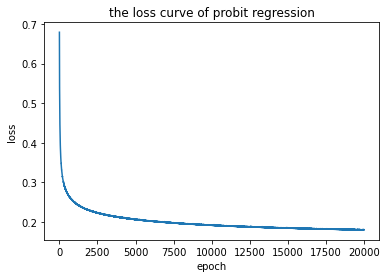

the model weight matrix shape: (34, 1)
the bias matrix shape: (1, 1).


In [6]:
# train the probit regression model
lda_pr = LDA_PR(input_dim=input_dim,output_dim=output_dim)
all_loss = lda_pr.fit(train_feautres,train_labels,lr = 0.001,max_epoch = 20000,batch_size = 64,epsilon = 1e-6,show_parameter=True)
# display the loss curve
plt.plot(np.array(all_loss).flatten(),label='loss')
plt.title('the loss curve of probit regression')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_pr.get_w().shape,lda_pr.get_b().shape))

In [7]:
# test  the probit regression model
train_error_rate_for_lda_pr = test(lda_pr,train_feautres,train_labels)
test_error_rate_for_lda_pr = test(lda_pr,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_lda_pr,test_error_rate_for_lda_pr))

train error rate: 0.085
test error rate: 0.09271523178807947


In [8]:
# train the LDA_PGM model 
lda_pgm = LDA_PGM(input_dim=input_dim,output_dim=output_dim)
lda_pgm.fit(train_feautres,train_labels)
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_pgm.get_w().shape,lda_pgm.get_b().shape))

(34, 34)
the model weight matrix shape: (34,)
the bias matrix shape: ().


In [9]:
# test the LDA_PGM model
train_error_rate_for_lda_pgm = test(lda_pgm,train_feautres,train_labels)
test_error_rate_for_lda_pgm = test(lda_pgm,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_lda_pgm,test_error_rate_for_lda_pgm))

train error rate: 0.125
test error rate: 0.09271523178807947
